Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters found:  {'learning_rate': 0.3}
Multi-class AUC score: 0.9883
F1 Micro score: 0.9618
F1 Macro score: 0.6797


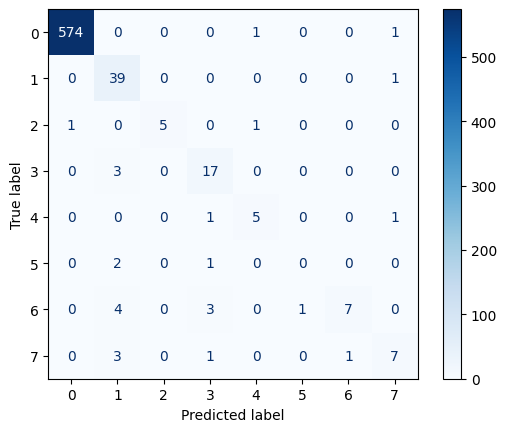

In [1]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Load the datasets
minmax_onehot_df = pd.read_csv('./2-minmax_label_1_1.csv')
target_df = pd.read_csv('./target_c.csv')

# Extract the target variable
y = target_df['LET_IS']

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(minmax_onehot_df, y_encoded, test_size=0.2, random_state=42)

# Create the CatBoost model
cat_model = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', verbose=0)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.3],
    # 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    # 'depth': [3, 6, 9, 15, 30],
    # 'l2_leaf_reg': [1, 3, 5]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=cat_model, param_grid=param_grid, scoring='roc_auc_ovr', cv=3, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)
y_pred = best_model.predict(X_test)

# Calculate the AUC score for each class
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(f'Multi-class AUC score: {auc:.4f}')

# Calculate the F1 scores
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')

print(f'F1 Micro score: {f1_micro:.4f}')
print(f'F1 Macro score: {f1_macro:.4f}')

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [10]:
y_pred_proba.shape


(680, 8)

# LET_IS_C

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters found:  {'learning_rate': 0.3}
Binary AUC score: 0.9986
F1 Micro score: 0.9956
F1 Macro score: 0.9915


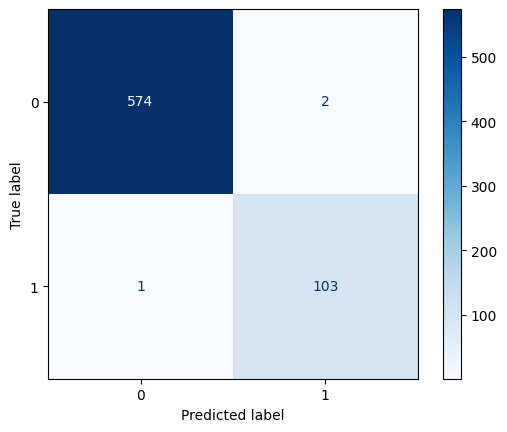

In [5]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Load the datasets
minmax_onehot_df = pd.read_csv('./2-minmax_label_1_5.csv')
target_df = pd.read_csv('./1_5y_c.csv')

# Extract the target variable
y = target_df['LET_IS_C']

# Encode the categorical target variable if needed
# Assuming the target variable is already binary (0 and 1), so no encoding is necessary
# If not, uncomment the following lines
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)
y_encoded = y

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(minmax_onehot_df, y_encoded, test_size=0.2, random_state=42)

# Create the CatBoost model
cat_model = CatBoostClassifier(loss_function='Logloss', eval_metric='AUC', verbose=0)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.3],
    # 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    # 'depth': [3, 6, 9, 15, 30],
    # 'l2_leaf_reg': [1, 3, 5]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=cat_model, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f'Binary AUC score: {auc:.4f}')

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')

print(f'F1 Micro score: {f1_micro:.4f}')
print(f'F1 Macro score: {f1_macro:.4f}')

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters found:  {'learning_rate': 0.3}
Binary AUC score: 0.9986
F1 Micro score: 0.9956
F1 Macro score: 0.9915


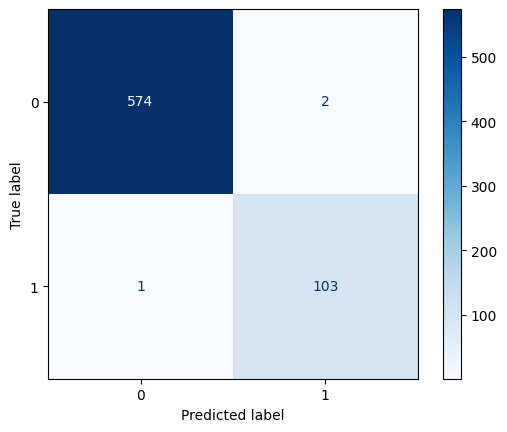

In [10]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Load the datasets
minmax_onehot_df = pd.read_csv('./2-minmax_label_1_5.csv')
target_df = pd.read_csv('./1_5y_c.csv')

# Extract the target variable
y = target_df['LET_IS_C']

# Encode the categorical target variable if needed
# Assuming the target variable is already binary (0 and 1), so no encoding is necessary
# If not, uncomment the following lines
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)
y_encoded = y

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(minmax_onehot_df, y_encoded, test_size=0.2, random_state=42)

# Create the CatBoost model
cat_model = CatBoostClassifier(loss_function='Logloss', eval_metric='AUC', verbose=0)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.3],
    # 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    # 'depth': [3, 6, 9, 15, 30],
    # 'l2_leaf_reg': [1, 3, 5]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=cat_model, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f'Binary AUC score: {auc:.4f}')

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')

print(f'F1 Micro score: {f1_micro:.4f}')
print(f'F1 Macro score: {f1_macro:.4f}')

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()



# NESTED CROSS VALIDATION

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Nested CV accuracy scores: [0.95280236 0.95280236 0.95575221 0.97341211 0.9379616 ]
Mean Nested CV accuracy score: 0.9545
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Multi-class AUC score: 0.9889
F1 Micro score: 0.9528
F1 Macro score: 0.6425


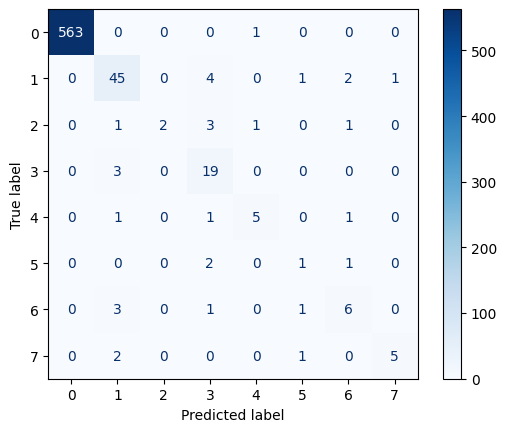

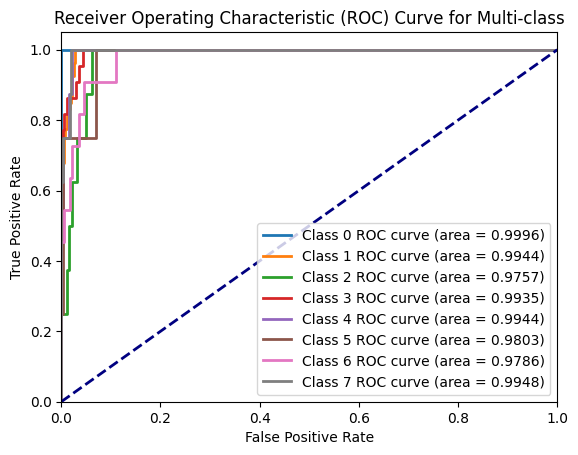

In [6]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import warnings
import numpy as np

warnings.filterwarnings('ignore')

# Load the datasets
minmax_onehot_df = pd.read_csv('./preprocessed_data/2-minmax_no_encoding_1_3.csv')
target_df = pd.read_csv('./rawdata/1_3y.csv')

# Extract the target variable
y = target_df['LET_IS']

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Define the parameter grid for CatBoost
param_grid = {
    'learning_rate': [0.3],
    # 'depth': [4, 6, 8],
    # 'l2_leaf_reg': [1, 3, 5]
}

# Create the CatBoost model
cat_model = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', verbose=0)

# Nested cross-validation with GridSearchCV
inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV for the inner loop (hyperparameter tuning)
grid_search = GridSearchCV(estimator=cat_model, param_grid=param_grid, scoring='accuracy', cv=inner_cv, verbose=1)

# Perform Nested CV
nested_cv_scores = cross_val_score(grid_search, minmax_onehot_df, y_encoded, cv=outer_cv, scoring='accuracy')
print(f'Nested CV accuracy scores: {nested_cv_scores}')
print(f'Mean Nested CV accuracy score: {nested_cv_scores.mean():.4f}')

# Split the data into training and test sets for final evaluation
X_train, X_test, y_train, y_test = train_test_split(minmax_onehot_df, y_encoded, test_size=0.3, random_state=42)

# Fit the best model on the entire training set
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Use the best model to make predictions on the test set
y_pred_proba = best_model.predict_proba(X_test)
y_pred = best_model.predict(X_test)

# Calculate the AUC score (One-vs-Rest)
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(f'Multi-class AUC score: {auc_score:.4f}')

# Calculate the F1 scores
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')

print(f'F1 Micro score: {f1_micro:.4f}')
print(f'F1 Macro score: {f1_macro:.4f}')

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Plot the ROC curve for each class
plt.figure()
for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} ROC curve (area = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class')
plt.legend(loc='lower right')
plt.show()


# no param grid

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import warnings
import numpy as np

warnings.filterwarnings('ignore')

def run_catboost_model(scaled_file, target_file):
    # Load the datasets
    scaled_df = pd.read_csv(scaled_file)
    target_df = pd.read_csv(target_file)

    # Extract the target variable
    y = target_df['LET_IS']

    # Encode the categorical target variable
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Define fixed parameters for CatBoost
    cat_model = CatBoostClassifier(
        loss_function='MultiClass', 
        eval_metric='MultiClass', 
        learning_rate=0.3, 
        depth=6, 
        l2_leaf_reg=3, 
        verbose=0
    )

    # Perform Nested CV
    outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
    nested_cv_scores = cross_val_score(cat_model, scaled_df, y_encoded, cv=outer_cv, scoring='accuracy')
    print(f'Nested CV accuracy scores for {scaled_file}: {nested_cv_scores}')
    print(f'Mean Nested CV accuracy score for {scaled_file}: {nested_cv_scores.mean():.4f}')

    # Split the data into training and test sets for final evaluation
    X_train, X_test, y_train, y_test = train_test_split(scaled_df, y_encoded, test_size=0.2, random_state=42)

    # Fit the model on the entire training set
    cat_model.fit(X_train, y_train)

    # Use the model to make predictions on the test set
    y_pred_proba = cat_model.predict_proba(X_test)
    y_pred = cat_model.predict(X_test)

    # Calculate the AUC score (One-vs-Rest)
    auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    print(f'Multi-class AUC score for {scaled_file}: {auc_score:.4f}')

    # Calculate the F1 scores
    f1_micro = f1_score(y_test, y_pred, average='micro')
    f1_macro = f1_score(y_test, y_pred, average='macro')

    print(f'F1 Micro score for {scaled_file}: {f1_micro:.4f}')
    print(f'F1 Macro score for {scaled_file}: {f1_macro:.4f}')

    # Plot the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    # Plot the ROC curve for each class
    plt.figure()
    for i in range(len(label_encoder.classes_)):
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {i} ROC curve (area = {roc_auc:.4f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Multi-class ({scaled_file})')
    plt.legend(loc='lower right')
    plt.show()

# List of preprocessed files
scaled_files = [
    './preprocessed_data/2-minmax_no_encoding_1_1.csv',
    './preprocessed_data/2-robust_no_encoding_1_1.csv',
    './preprocessed_data/2-log_no_encoding_1_1.csv',
    './preprocessed_data/2-normalize_no_encoding_1_1.csv',
    './preprocessed_data/2-maxabs_no_encoding_1_1.csv',
    './preprocessed_data/2-zscore_no_encoding_1_1.csv'
]

# Target file
target_file = './rawdata/target.csv'

# Run the model for each scaled file
for scaled_file in scaled_files:
    run_catboost_model(scaled_file, target_file)
